# Business Problem & Opportunity
Industrial equipment failures cause significant production downtime, costing manufacturers an average of $50,000-$100,000 per hour. A predictive maintenance system that analyzes sensor data to forecast equipment failures before they occur can dramatically reduce these costs.

flowchart TB
    data[Data Collection] --> preprocess[Data Preprocessing]
    preprocess --> eda[Exploratory Data Analysis]
    eda --> feature[Feature Engineering]
    feature --> model[Model Selection & Training]
    model --> eval[Model Evaluation]
    eval --> opt[Model Optimization]
    opt --> deploy[Deployment]
    deploy --> monitor[Monitoring]
    monitor --> maintain[Maintenance]

## 1. Data Collection & Preprocessing


In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv(r'E:\DOCUMENTS\Open Online Class\Data Science Analyst\Own projectss\predictive maintenance ai4i2020\ai4i2020.csv')

# Basic cleaning
df = df.dropna()
df = df.drop_duplicates()

df.head(10)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,5079,mostly24-4aeb-49bc-9e92-f8605f05f3f3,L,304.2,313.5,1620,42.1,219,1,1,0,0,0,0
1,6514,mostly4a-17c4-4adf-a52b-b2549d981fa7,M,301.2,310.7,1334,41.7,139,0,0,0,0,0,0
2,1580,mostlye4-d059-44e0-bf00-3a9b26ebeee5,M,298.0,307.7,1694,27.6,49,0,0,0,0,0,0
3,4482,mostly48-5bae-4b00-969e-b360f72deafc,L,302.6,310.2,1440,46.8,192,0,0,0,0,0,0
4,4463,mostly47-b427-439f-aa02-c4aa73c53792,H,303.1,310.5,1441,48.0,185,0,0,0,0,0,0
5,677,mostlyf0-7d43-44b9-8890-34f0d0f74589,L,297.6,308.7,1567,38.2,37,0,0,0,0,0,0
6,6291,mostly97-53d1-4d8a-a93b-85f6281a57d4,H,300.9,310.5,1648,30.1,27,0,0,0,0,0,0
7,8474,mostlyaa-abfb-446f-9d25-93275cc2e264,L,297.4,309.1,1352,51.1,205,0,0,0,0,0,0
8,792,mostlya2-02f0-4cbe-99cc-d271c0afe2f8,H,296.8,307.8,1571,34.8,105,0,0,0,0,0,0
9,9316,mostly02-2406-4d7a-bce1-3774dada2184,M,298.3,308.1,2070,16.9,65,0,0,0,0,0,0


In [3]:
# Data type conversion
numeric_features = ['Air temperature [K]', 'Process temperature [K]',
                   'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']
categorical_features = ['Type', 'Product ID']

# Create target variable
df['Target'] = df['Machine failure']  # Or more specific failure type

df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,Target
0,5079,mostly24-4aeb-49bc-9e92-f8605f05f3f3,L,304.2,313.5,1620,42.1,219,1,1,0,0,0,0,1
1,6514,mostly4a-17c4-4adf-a52b-b2549d981fa7,M,301.2,310.7,1334,41.7,139,0,0,0,0,0,0,0
2,1580,mostlye4-d059-44e0-bf00-3a9b26ebeee5,M,298.0,307.7,1694,27.6,49,0,0,0,0,0,0,0
3,4482,mostly48-5bae-4b00-969e-b360f72deafc,L,302.6,310.2,1440,46.8,192,0,0,0,0,0,0,0
4,4463,mostly47-b427-439f-aa02-c4aa73c53792,H,303.1,310.5,1441,48.0,185,0,0,0,0,0,0,0


In [4]:
df.shape

(500000, 15)

In [5]:
# Split data
X = df.drop(['UDI', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF', 'Target'], axis=1)
y = df['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Create preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Apply preprocessing
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

print("X_train_processed is: ",X_train_processed.shape)
print("X_test_processed is: ",X_test_processed.shape)

X_train_processed is:  (400000, 400008)
X_test_processed is:  (100000, 400008)


## 2. Exploratory Data Analysis

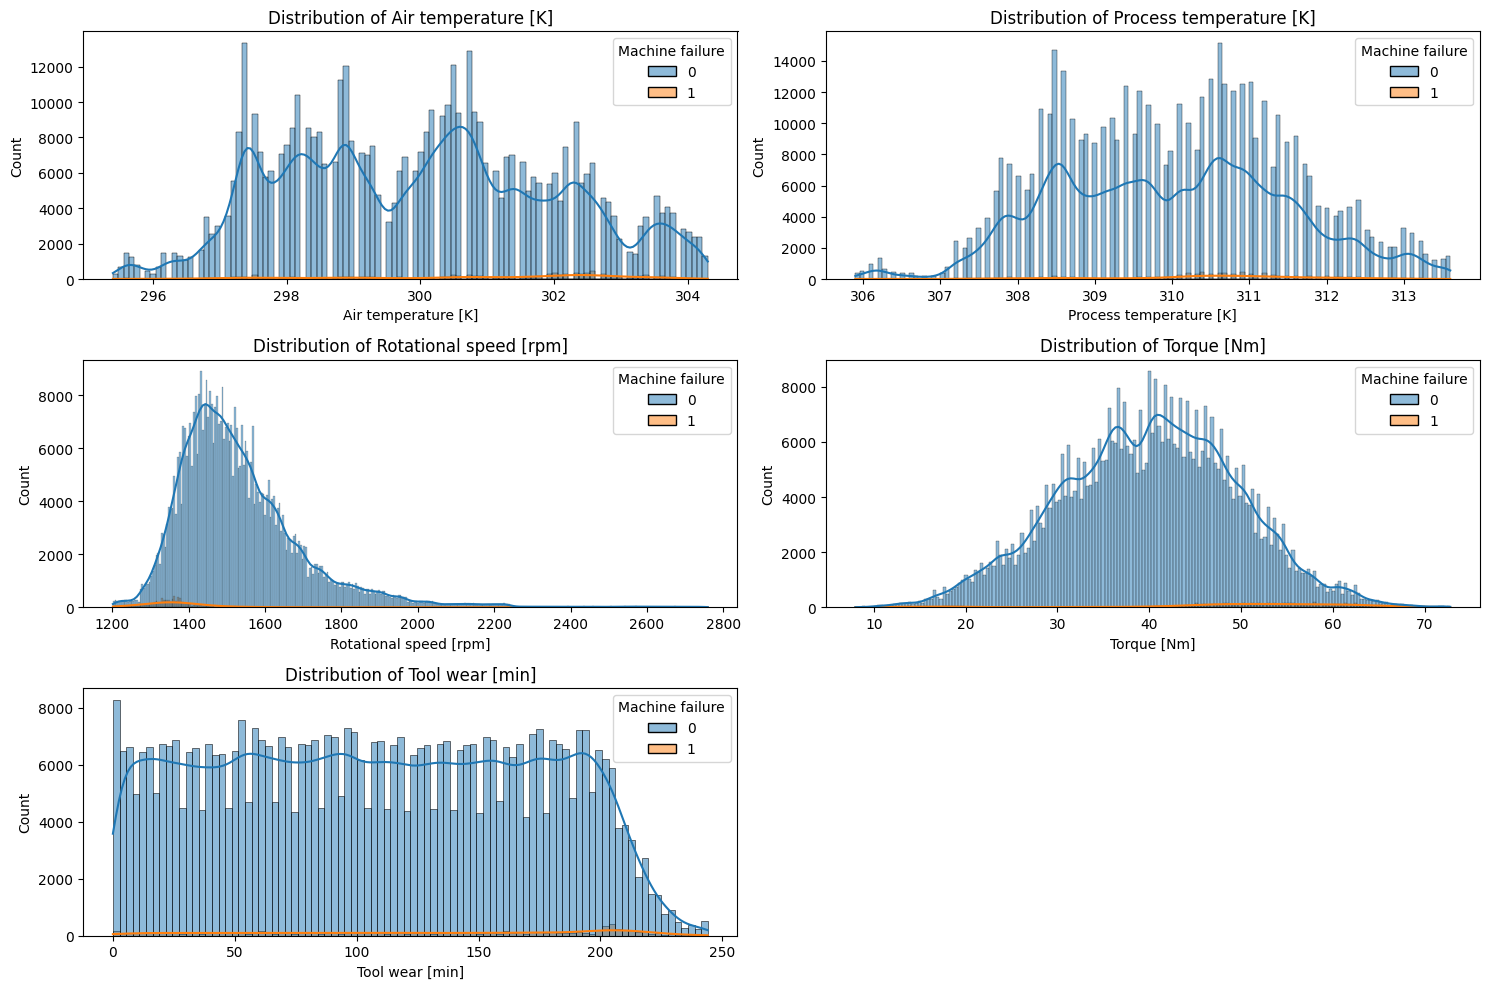

In [6]:
# Distribution of numeric features
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numeric_features):
    plt.subplot(3, 2, i+1)
    sns.histplot(data=df, x=feature, hue='Machine failure', kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

The image shows multiple histograms with **Kernel Density Estimation (KDE) plots**, displaying the distributions of different numerical features related to machine operation. Each plot is categorized by **Machine failure** (0 = No failure, 1 = Failure). Let's analyze the insights you can gain:

---

### **1. Air Temperature [K]**
   - The distribution is **multimodal**, meaning there are multiple peaks, suggesting that different operating conditions exist.
   - **Machine failures (orange) are rare** across all air temperature values.
   - No strong correlation is visible between air temperature and machine failure.

#### **Insight**:
   - Air temperature alone **is not a strong indicator** of machine failure.

---

### **2. Process Temperature [K]**
   - The distribution is also **multimodal**, similar to air temperature.
   - Failures (orange bars) occur across different process temperatures but remain sparse.
   - The density curve suggests that **higher process temperatures may have a slightly higher number of failures**.

#### **Insight**:
   - Process temperature **might** have some relationship with machine failure, but other factors likely contribute more significantly.

---

### **3. Rotational Speed [rpm]**
   - The distribution is **right-skewed**, meaning most machines operate at lower RPMs, and fewer machines operate at high speeds.
   - Machine failures (orange) appear **more frequent at lower RPMs**.

#### **Insight**:
   - Machines running at **lower RPMs are more likely to fail**.
   - Possibly, **low-speed operations cause stress on the system** (e.g., lack of lubrication, increased resistance).
   - Investigate **why failures occur more at lower RPMs**—is it due to machine wear, overheating, or incorrect operation?

---

### **4. Torque [Nm]**
   - The distribution is **bell-shaped (normal distribution)**, with most machines operating at moderate torque values.
   - Failures appear evenly spread but **slightly higher at extreme torque values** (both low and high).

#### **Insight**:
   - **Extreme torque values (too low or too high) may contribute to machine failure**.
   - High torque could indicate **excessive load**, while low torque might suggest **inefficient operation**.
   - Further analysis could check whether torque fluctuations correlate with failure rates.

---

### **5. Tool Wear [min]**
   - The distribution is **uniform** for most of the range but drops off at the higher end (around 250 min).
   - Failures (orange) **seem to increase slightly at high tool wear values**.

#### **Insight**:
   - **Higher tool wear is associated with more failures**.
   - Worn-out tools likely cause mechanical stress, overheating, or defects leading to failure.
   - **Regular tool maintenance/replacement might reduce failures**.

---

### **Overall Insights**
1. **Machine failures are rare**, meaning the dataset is **imbalanced**. Be careful when training a model—use techniques like oversampling or SMOTE.
2. **Rotational speed and torque are more correlated with failures** than air or process temperature.
3. **Failures occur more often at extreme values of torque and tool wear**, meaning maintenance strategies could focus on monitoring these factors.
4. **Air temperature and process temperature alone are weak failure predictors**, but they could be useful when combined with other factors.


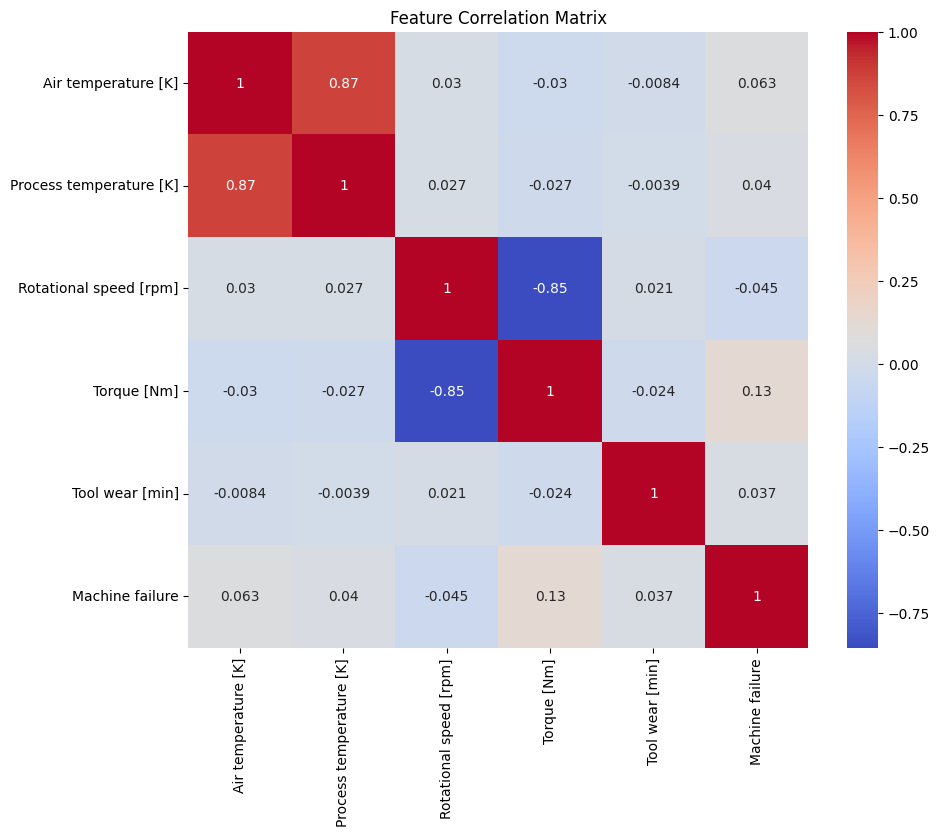

In [7]:
# Correlation matrix
corr_matrix = df[numeric_features + ['Machine failure']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

This heatmap displays the Pearson correlation coefficients between different machine parameters and machine failure. Let's break it down:

---

### **1. Strong Correlations**
- **Air Temperature [K] & Process Temperature [K] (0.87)**
  - **Highly correlated**, meaning an increase in air temperature strongly corresponds to an increase in process temperature.
  - This is expected since the process temperature depends on the surrounding environment.

- **Rotational Speed [rpm] & Torque [Nm] (-0.85)**
  - **Strong negative correlation**, meaning that as rotational speed increases, torque decreases.
  - This makes sense because high RPMs typically require lower torque, while low RPMs require higher torque.

---

### **2. Machine Failure Correlation**
- **Torque [Nm] (0.13)**
  - Weak positive correlation.
  - Suggests that **higher torque slightly increases the chance of failure**, but the effect is not strong.
  - Could indicate mechanical stress due to higher force exerted on machine components.

- **Air Temperature [K] (0.063) & Process Temperature [K] (0.04)**
  - **Very weak positive correlation**.
  - Temperature changes **don't significantly influence failure**, suggesting failures are more dependent on mechanical factors.

- **Tool Wear [min] (0.037)**
  - Weak positive correlation.
  - While wear increases failure probability slightly, the effect isn't dominant.

- **Rotational Speed [rpm] (-0.045)**
  - **Weak negative correlation**.
  - Machines running at **higher RPMs have a slightly lower failure rate**.
  - However, this effect is minor and not a strong predictor.

---

### **3. Key Insights**
1. **No single factor strongly predicts machine failure.**  
   - The highest correlation with failure (Torque = 0.13) is still quite weak.
   - This suggests that **failures are likely caused by a combination of multiple factors** rather than just one.

2. **Process and air temperature are highly correlated, but neither strongly affects failure.**  
   - Temperature monitoring alone may not be useful for failure prediction.

3. **Rotational speed and torque have an inverse relationship, but both have weak correlations with failure.**  
   - This suggests failure is not simply due to speed or torque alone.
   - A deeper **interaction-based analysis** (e.g., machine learning models) may be needed.

4. **Feature Engineering is necessary.**  
   - Since individual correlations are weak, try:
     - **Creating new features** (e.g., Torque * RPM, Temperature differences).
     - **Using non-linear models** (e.g., decision trees, neural networks) to capture hidden patterns.

---

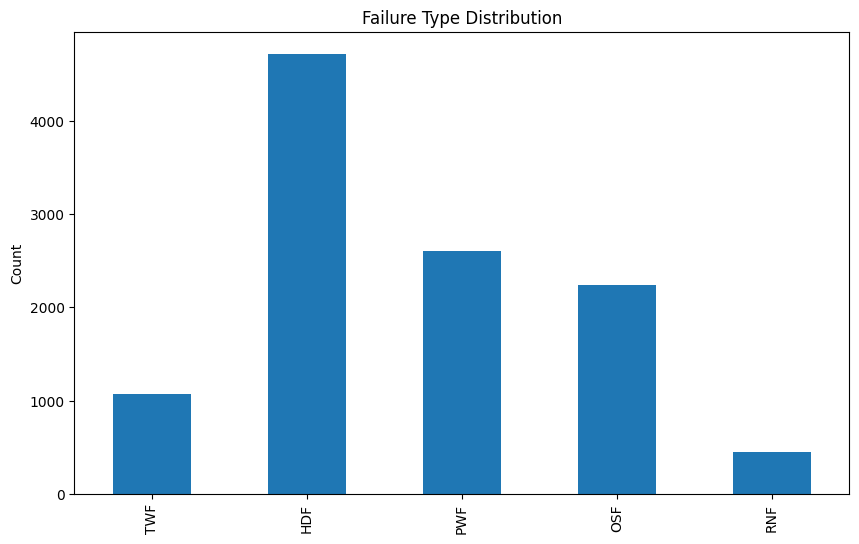

In [8]:
# Failure type distribution
failure_counts = df[['TWF', 'HDF', 'PWF', 'OSF', 'RNF']].sum()
plt.figure(figsize=(10, 6))
failure_counts.plot(kind='bar')
plt.title('Failure Type Distribution')
plt.ylabel('Count')
plt.show()

- **HDF (Highest Count)**
  - HDF (likely **Heat Dissipation Failure**) is the most frequent failure type.
  - This suggests **thermal issues** are a dominant cause of machine failure.
  - Possible causes: Overheating, poor cooling systems, or excessive workload.

- **PWF & OSF (Moderate Counts)**
  - **PWF (Power Failure)** and **OSF (Overstrain Failure)** occur quite frequently.
  - Electrical failures and mechanical stress might be key factors.
  - Further analysis needed on **voltage fluctuations, torque variations, and operational loads**.

- **TWF (Lower Count)**
  - **TWF (Tool Wear Failure)** has a lower but notable count.
  - Indicates **tool degradation contributes to failures but is not the primary cause**.
  - Could be managed with **predictive maintenance strategies**.

- **RNF (Lowest Count)**
  - **RNF (Random Failure)** is the least frequent.
  - This suggests that **most failures follow identifiable patterns** rather than being unpredictable.
  - This is good for **failure prediction models**, as most failures might have measurable precursors.

### **Key Takeaways**
✅ **Heat and power-related failures dominate.**  
✅ **Tool wear is a factor but not the primary failure mode.**  
✅ **Random failures are minimal, meaning predictive models could be highly effective.**  

C:\Users\Zhong Hong\AppData\Local\Temp\ipykernel_10064\951964893.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.lineplot(data=df, x='Tool wear [min]', y='Machine failure', ci=95)


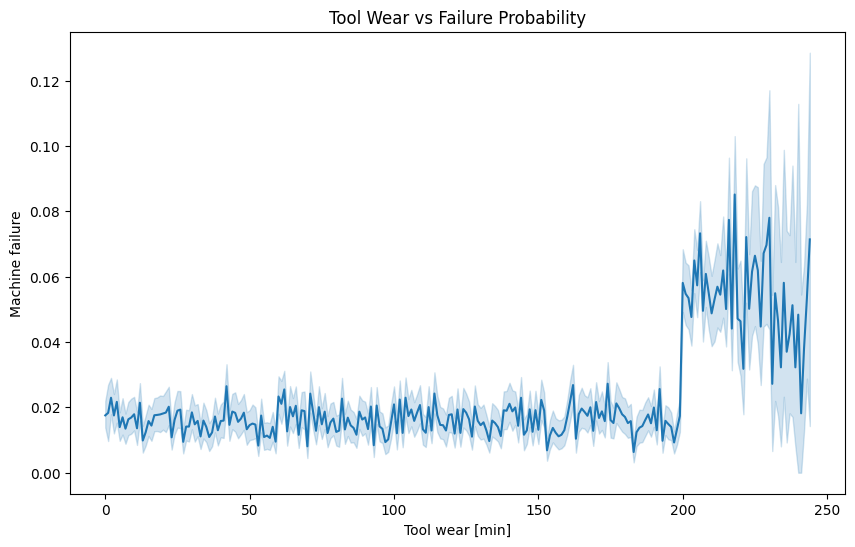

In [9]:
# Tool wear vs failure probability
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Tool wear [min]', y='Machine failure', ci=95)
plt.title('Tool Wear vs Failure Probability')
plt.show()

### **Key Observations**
1. **Low Failure Probability (0 - 180 min)**
   - In the early stages (0-180 min), failure probability remains **low and stable** (~0.02 or 2%).
   - This suggests that machine components operate within a safe range during this period.

2. **Sharp Increase in Failure Probability (~200 min)**
   - Around **200 minutes**, failure probability **rises sharply**.
   - This indicates that the tool enters a **critical wear phase**, where breakdowns are much more likely.
   - This could be due to:
     - **Increased friction** leading to overheating.
     - **Material fatigue** reducing tool efficiency.
     - **Vibration effects** causing instability.

3. **High Variability Beyond 200 min**
   - Post **200 min**, failure probability fluctuates significantly, reaching over **12% at peak**.
   - Suggests **unpredictable failures**, likely due to:
     - Sudden tool breakage.
     - Accumulated wear leading to erratic performance.

---

### **Key Takeaways**
✅ **Safe operational window:** 0 - 180 minutes.  
✅ **Critical failure threshold:** ~200 minutes.  
✅ **Unpredictability increases post 200 min, requiring preventive measures.**  


## 3. Feature Engineering

In [10]:
# Create interaction features
df['Temp_diff'] = df['Process temperature [K]'] - df['Air temperature [K]']
df['Power'] = df['Rotational speed [rpm]'] * df['Torque [Nm]'] / 9550  # Mechanical power in kW

# Create operational efficiency metric
df['Operation_efficiency'] = df['Rotational speed [rpm]'] / (df['Torque [Nm]'] + 1)

# Create maintenance-related features
df['Tool_wear_rate'] = df['Tool wear [min]'] / df.groupby('Product ID')['Tool wear [min]'].transform('max')

# Exponential moving averages for key metrics
for window in [5, 10, 20]:
    df[f'Torque_EMA_{window}'] = df.groupby('UDI')['Torque [Nm]'].transform(
        lambda x: x.ewm(span=window, adjust=False).mean())

In [11]:
# Feature selection using mutual information
from sklearn.feature_selection import mutual_info_classif

# find Mutual Information (MI) scores
def calculate_mi_scores(X, y):
    # Get numerical features from X_train's columns
    numerical_features_in_X = X.select_dtypes(include=np.number).columns.tolist()

    # Subset X to include only numerical features before calculating MI scores
    X_numerical = X[numerical_features_in_X]

    mi_scores = mutual_info_classif(X_numerical, y)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X_numerical.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = calculate_mi_scores(X_train, y_train)
print(mi_scores)

Rotational speed [rpm]     0.019074
Torque [Nm]                0.018341
Air temperature [K]        0.005818
Process temperature [K]    0.003860
Tool wear [min]            0.002720
Name: MI Scores, dtype: float64


**Best Practices:**

* Document domain knowledge used in feature creation
* Create features that capture physical/mechanical relationships
* Use feature importance metrics to select meaningful features
* Maintain separate train/validation/test splits during feature creation

## [4. Model Selection & Training](https://)

In [12]:
# Install required packages
!pip install xgboost lightgbm


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, f1_score
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define a simple function to evaluate and time model performance
def evaluate_model(model_name, model, X_train, X_test, y_train, y_test):
    # Time training
    start_time = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_time

    # Time prediction
    start_time = time.time()
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    pred_time = time.time() - start_time

    # Calculate metrics
    auc = roc_auc_score(y_test, y_prob)
    f1 = f1_score(y_test, y_pred)

    # Print quick summary
    print(f"\n{model_name}:")
    print(f"  Training time: {train_time:.2f} sec")
    print(f"  Prediction time: {pred_time:.2f} sec")
    print(f"  ROC AUC: {auc:.4f}")
    print(f"  F1 Score: {f1:.4f}")

    # Return results dictionary
    return {
        'model': model,
        'name': model_name,
        'y_pred': y_pred,
        'y_prob': y_prob,
        'auc': auc,
        'f1': f1,
        'train_time': train_time,
        'pred_time': pred_time
    }

In [14]:
# Define models to try (with optimized parameters)
models = {
    'Logistic Regression': LogisticRegression(solver='liblinear', max_iter=500, C=0.1, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=50, max_depth=10, n_jobs=-1, random_state=42),
    'XGBoost': XGBClassifier(
        n_estimators=50, max_depth=6, learning_rate=0.1,
        tree_method='hist', n_jobs=-1, random_state=42
    ),
    'LightGBM': LGBMClassifier(
        n_estimators=50, max_depth=6, learning_rate=0.1,
        n_jobs=-1, verbose=-1, random_state=42
    )
}

# Train and evaluate all models
results = []
for name, model in models.items():
    result = evaluate_model(name, model, X_train_processed, X_test_processed, y_train, y_test)
    results.append(result)

# Find best model based on F1 score
results_df = pd.DataFrame([
    {'Model': r['name'], 'AUC': r['auc'], 'F1': r['f1'],
     'Training Time': r['train_time'], 'Prediction Time': r['pred_time']}
    for r in results
])

print("\nModel Comparison:")
print(results_df.sort_values('F1', ascending=False))

# Select best model
best_result = max(results, key=lambda x: x['f1'])
best_model = best_result['model']
print(f"\nBest model: {best_result['name']} with F1: {best_result['f1']:.4f}")

# Detailed analysis of best model
print("\nDetailed evaluation of best model:")
print(classification_report(y_test, best_result['y_pred']))



Logistic Regression:
  Training time: 1.87 sec
  Prediction time: 0.01 sec
  ROC AUC: 0.8236
  F1 Score: 0.0102

Random Forest:
  Training time: 2.15 sec
  Prediction time: 0.36 sec
  ROC AUC: 0.7048
  F1 Score: 0.0000

XGBoost:
  Training time: 34.91 sec
  Prediction time: 16.69 sec
  ROC AUC: 0.9176
  F1 Score: 0.1151


c:\Users\Zhong Hong\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\Zhong Hong\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



LightGBM:
  Training time: 3.79 sec
  Prediction time: 2.17 sec
  ROC AUC: 0.9195
  F1 Score: 0.1413

Model Comparison:
                 Model       AUC        F1  Training Time  Prediction Time
3             LightGBM  0.919471  0.141304       3.792953         2.169086
2              XGBoost  0.917638  0.115094      34.906065        16.694092
0  Logistic Regression  0.823608  0.010225       1.872339         0.012044
1        Random Forest  0.704771  0.000000       2.147684         0.355106

Best model: LightGBM with F1: 0.1413

Detailed evaluation of best model:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     98079
           1       0.54      0.08      0.14      1921

    accuracy                           0.98    100000
   macro avg       0.76      0.54      0.57    100000
weighted avg       0.97      0.98      0.97    100000



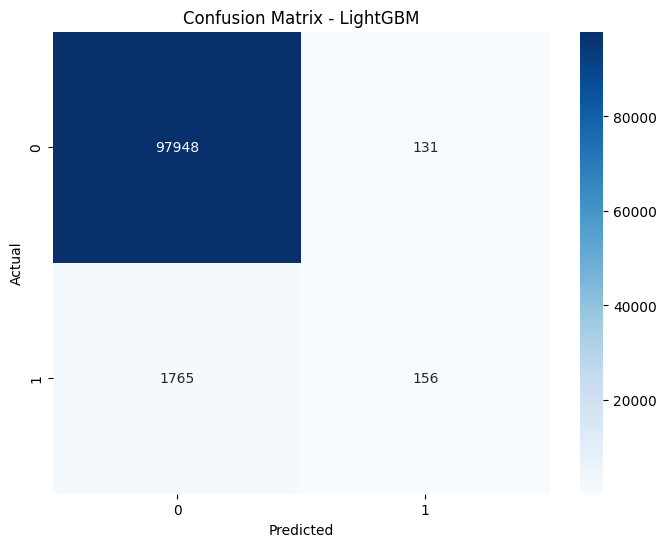

In [15]:
# Plot confusion matrix
cm = confusion_matrix(y_test, best_result['y_pred'])
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix - {best_result["name"]}')
plt.show()

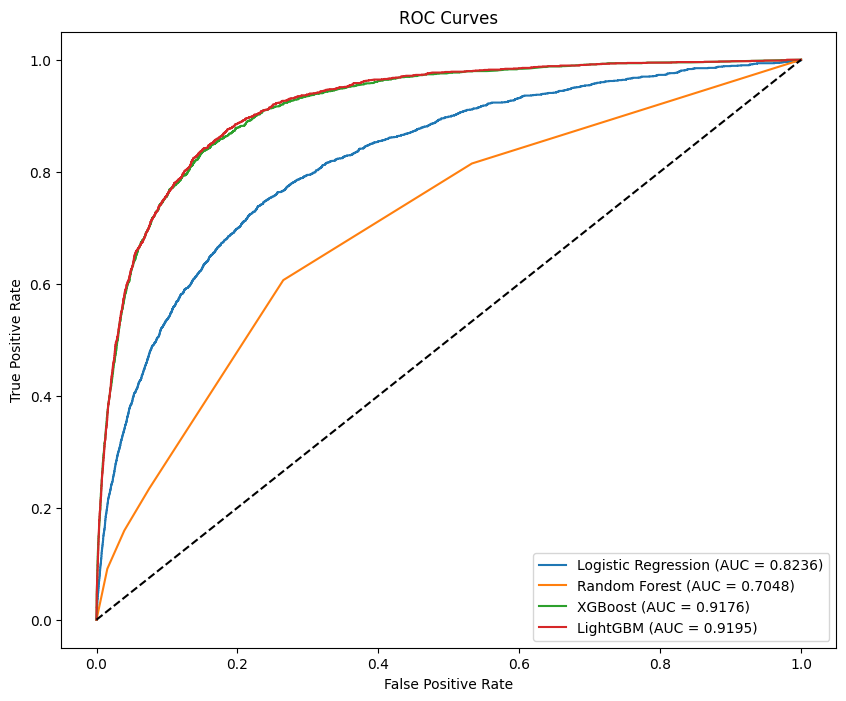

Best model saved to 'best_model.pkl'


In [16]:
# Plot ROC curve of all models
plt.figure(figsize=(10, 8))
for r in results:
    from sklearn.metrics import roc_curve
    fpr, tpr, _ = roc_curve(y_test, r['y_prob'])
    plt.plot(fpr, tpr, label=f"{r['name']} (AUC = {r['auc']:.4f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='lower right')
plt.show()

# Save best model for deployment
import joblib
joblib.dump(best_model, 'best_model.pkl')
print("Best model saved to 'best_model.pkl'")

**Model Selection Considerations:**

* XGBoost/LGBM usually perform well for tabular data
* Consider using stacked ensembles for better performance
* For time-series aspects, consider adding LSTM/1D CNN components

## 5. Model Evaluation & Optimization

In [17]:
!pip install lightgbm optuna


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [18]:
import lightgbm as lgb
from lightgbm import LGBMClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score
import optuna
import numpy as np
import pandas as pd

# Define cross-validation evaluation function
def evaluate_lgbm(model, X, y):
    # Make sure X and y are in the right format
    # if isinstance(X, np.ndarray):  # No need to check for ndarray now
    #     X = pd.DataFrame(X)
    if isinstance(y, np.ndarray):
        y = pd.Series(y)

    cv = KFold(n_splits=5, shuffle=True, random_state=42)
    cv_scores = {
        'f1': [],
        'precision': [],
        'recall': [],
        'auc': []
    }

    # Perform cross-validation
    for train_idx, val_idx in cv.split(X):
        # Use indexing for sparse matrices or arrays
        X_cv_train, X_cv_val = X[train_idx], X[val_idx]
        y_cv_train, y_cv_val = y.iloc[train_idx], y.iloc[val_idx]

        # Use callbacks for early stopping
        model.fit(
            X_cv_train, y_cv_train,
            eval_set=[(X_cv_val, y_cv_val)],
            callbacks=[
                lgb.early_stopping(stopping_rounds=50),
                lgb.log_evaluation(period=0)  # Suppress logging
            ]
        )

        y_pred = model.predict(X_cv_val)
        y_prob = model.predict_proba(X_cv_val)[:, 1]

        cv_scores['f1'].append(f1_score(y_cv_val, y_pred))
        cv_scores['precision'].append(precision_score(y_cv_val, y_pred))
        cv_scores['recall'].append(recall_score(y_cv_val, y_pred))
        cv_scores['auc'].append(roc_auc_score(y_cv_val, y_prob))

    # Calculate mean and std for each metric
    results = {}
    for metric, scores in cv_scores.items():
        results[f'{metric}_mean'] = np.mean(scores)
        results[f'{metric}_std'] = np.std(scores)

    return results

c:\Users\Zhong Hong\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [19]:
# Define Optuna optimization objective
def objective(trial):
    # Define hyperparameters to search
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 200),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'num_leaves': trial.suggest_int('num_leaves', 20, 100),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'min_child_samples': trial.suggest_int('min_child_samples', 10, 50),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.01, 5.0, log=True),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.01, 5.0, log=True),
        'class_weight': 'balanced',
        'n_jobs': -1,
        'random_state': 42
    }

    # Create LightGBM model
    model = LGBMClassifier(**params)

    # Evaluate model
    results = evaluate_lgbm(model, X_train_processed, y_train)

    # We'll optimize for F1 score
    return results['f1_mean']

In [20]:
# Create Optuna study and optimize
study = optuna.create_study(direction="maximize") # Create a study object
study.optimize(objective, n_trials=10)  # Run optimization for 10 trials

# Train final model with best parameters
final_params = study.best_params
final_params.update({
    'class_weight': 'balanced',
    'n_jobs': -1,
    'random_state': 42
})

final_model = LGBMClassifier(**final_params)
final_model.fit(
    X_train_processed, y_train,
    eval_set=[(X_test_processed, y_test)],
    callbacks=[
        lgb.early_stopping(stopping_rounds=50),
        lgb.log_evaluation(period=50)  # Show logs every 50 iterations
    ]
)

[I 2025-02-21 15:56:56,682] A new study created in memory with name: no-name-eb93ee24-82ab-4f2a-b0fe-adf42249177f


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[61]	valid_0's binary_logloss: 0.313863


c:\Users\Zhong Hong\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\Zhong Hong\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[61]	valid_0's binary_logloss: 0.317818


c:\Users\Zhong Hong\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\Zhong Hong\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[61]	valid_0's binary_logloss: 0.308807


c:\Users\Zhong Hong\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\Zhong Hong\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[61]	valid_0's binary_logloss: 0.313883


c:\Users\Zhong Hong\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\Zhong Hong\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[61]	valid_0's binary_logloss: 0.311392


c:\Users\Zhong Hong\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\Zhong Hong\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
[I 2025-02-21 15:57:43,774] Trial 0 finished with value: 0.18593904323120775 and parameters: {'n_estimators': 61, 'learning_rate': 0.10473579942611264, 'num_leaves': 88, 'max_depth': 9, 'min_child_samples': 39, 'subsample': 0.7798031727905737, 'colsample_bytree': 0.7507380974180113, 'reg_alpha': 0.05697391289226687, 'reg_lambda': 0.013774340612822022}. Best is trial 0 with value: 0.18593904323120775.


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[172]	valid_0's binary_logloss: 0.349007


c:\Users\Zhong Hong\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\Zhong Hong\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[172]	valid_0's binary_logloss: 0.353172


c:\Users\Zhong Hong\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\Zhong Hong\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[172]	valid_0's binary_logloss: 0.344849


c:\Users\Zhong Hong\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\Zhong Hong\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[172]	valid_0's binary_logloss: 0.348474


c:\Users\Zhong Hong\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\Zhong Hong\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[172]	valid_0's binary_logloss: 0.346183


c:\Users\Zhong Hong\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\Zhong Hong\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
[I 2025-02-21 15:58:50,427] Trial 1 finished with value: 0.17149986005919388 and parameters: {'n_estimators': 172, 'learning_rate': 0.038228162311246996, 'num_leaves': 64, 'max_depth': 5, 'min_child_samples': 14, 'subsample': 0.5963791664806206, 'colsample_bytree': 0.7530940238716161, 'reg_alpha': 0.170530108949914, 'reg_lambda': 0.7064200864522597}. Best is trial 0 with value: 0.18593904323120775.


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[159]	valid_0's binary_logloss: 0.32431


c:\Users\Zhong Hong\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\Zhong Hong\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[159]	valid_0's binary_logloss: 0.328225


c:\Users\Zhong Hong\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\Zhong Hong\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[159]	valid_0's binary_logloss: 0.319755


c:\Users\Zhong Hong\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\Zhong Hong\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[159]	valid_0's binary_logloss: 0.324918


c:\Users\Zhong Hong\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\Zhong Hong\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[159]	valid_0's binary_logloss: 0.321519


c:\Users\Zhong Hong\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\Zhong Hong\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
[I 2025-02-21 15:59:49,136] Trial 2 finished with value: 0.18102794223168045 and parameters: {'n_estimators': 159, 'learning_rate': 0.06238591694880985, 'num_leaves': 77, 'max_depth': 6, 'min_child_samples': 35, 'subsample': 0.7263849905889121, 'colsample_bytree': 0.9096760311098797, 'reg_alpha': 0.010347202613802644, 'reg_lambda': 1.190052255391678}. Best is trial 0 with value: 0.18593904323120775.


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[92]	valid_0's binary_logloss: 0.407864


c:\Users\Zhong Hong\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\Zhong Hong\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[92]	valid_0's binary_logloss: 0.41023


c:\Users\Zhong Hong\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\Zhong Hong\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[92]	valid_0's binary_logloss: 0.404426


c:\Users\Zhong Hong\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\Zhong Hong\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[92]	valid_0's binary_logloss: 0.407033


c:\Users\Zhong Hong\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\Zhong Hong\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[92]	valid_0's binary_logloss: 0.405074


c:\Users\Zhong Hong\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\Zhong Hong\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
[I 2025-02-21 16:00:35,136] Trial 3 finished with value: 0.1671178211285082 and parameters: {'n_estimators': 92, 'learning_rate': 0.018661221879483273, 'num_leaves': 38, 'max_depth': 7, 'min_child_samples': 25, 'subsample': 0.7626973584484411, 'colsample_bytree': 0.6126858056288995, 'reg_alpha': 0.27047430087320007, 'reg_lambda': 0.18374850111569851}. Best is trial 0 with value: 0.18593904323120775.


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[91]	valid_0's binary_logloss: 0.348691


c:\Users\Zhong Hong\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\Zhong Hong\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[91]	valid_0's binary_logloss: 0.352436


c:\Users\Zhong Hong\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\Zhong Hong\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[91]	valid_0's binary_logloss: 0.343751


c:\Users\Zhong Hong\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\Zhong Hong\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[91]	valid_0's binary_logloss: 0.348063


c:\Users\Zhong Hong\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\Zhong Hong\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[91]	valid_0's binary_logloss: 0.346081


c:\Users\Zhong Hong\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\Zhong Hong\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
[I 2025-02-21 16:01:15,911] Trial 4 finished with value: 0.17117027898525708 and parameters: {'n_estimators': 91, 'learning_rate': 0.07288910103668493, 'num_leaves': 92, 'max_depth': 5, 'min_child_samples': 31, 'subsample': 0.5957798414271995, 'colsample_bytree': 0.8584236072645015, 'reg_alpha': 0.016333504643725093, 'reg_lambda': 0.14918689747893502}. Best is trial 0 with value: 0.18593904323120775.


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[70]	valid_0's binary_logloss: 0.38579


c:\Users\Zhong Hong\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\Zhong Hong\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[70]	valid_0's binary_logloss: 0.388361


c:\Users\Zhong Hong\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\Zhong Hong\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[70]	valid_0's binary_logloss: 0.382588


c:\Users\Zhong Hong\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\Zhong Hong\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[70]	valid_0's binary_logloss: 0.384931


c:\Users\Zhong Hong\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\Zhong Hong\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[70]	valid_0's binary_logloss: 0.383027


c:\Users\Zhong Hong\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\Zhong Hong\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
[I 2025-02-21 16:01:54,132] Trial 5 finished with value: 0.1663467574031922 and parameters: {'n_estimators': 70, 'learning_rate': 0.035561718276903624, 'num_leaves': 80, 'max_depth': 4, 'min_child_samples': 21, 'subsample': 0.5457722223347576, 'colsample_bytree': 0.7232680033479277, 'reg_alpha': 0.0432562579587378, 'reg_lambda': 0.012101239359537894}. Best is trial 0 with value: 0.18593904323120775.


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[57]	valid_0's binary_logloss: 0.501169


c:\Users\Zhong Hong\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\Zhong Hong\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[57]	valid_0's binary_logloss: 0.502376


c:\Users\Zhong Hong\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\Zhong Hong\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[57]	valid_0's binary_logloss: 0.4995


c:\Users\Zhong Hong\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\Zhong Hong\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[57]	valid_0's binary_logloss: 0.500652


c:\Users\Zhong Hong\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\Zhong Hong\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[57]	valid_0's binary_logloss: 0.499428


c:\Users\Zhong Hong\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\Zhong Hong\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
[I 2025-02-21 16:02:39,255] Trial 6 finished with value: 0.1580446406271636 and parameters: {'n_estimators': 57, 'learning_rate': 0.012643095318710157, 'num_leaves': 42, 'max_depth': 5, 'min_child_samples': 24, 'subsample': 0.6453922819033687, 'colsample_bytree': 0.684707293492754, 'reg_alpha': 0.011257328976060748, 'reg_lambda': 0.8431833003740972}. Best is trial 0 with value: 0.18593904323120775.


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[74]	valid_0's binary_logloss: 0.335893


c:\Users\Zhong Hong\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\Zhong Hong\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[74]	valid_0's binary_logloss: 0.339799


c:\Users\Zhong Hong\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\Zhong Hong\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[74]	valid_0's binary_logloss: 0.329908


c:\Users\Zhong Hong\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\Zhong Hong\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[74]	valid_0's binary_logloss: 0.335007


c:\Users\Zhong Hong\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\Zhong Hong\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[74]	valid_0's binary_logloss: 0.332981


c:\Users\Zhong Hong\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\Zhong Hong\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
[I 2025-02-21 16:03:31,644] Trial 7 finished with value: 0.17633981289133177 and parameters: {'n_estimators': 74, 'learning_rate': 0.125146502257327, 'num_leaves': 34, 'max_depth': 8, 'min_child_samples': 33, 'subsample': 0.771646512925267, 'colsample_bytree': 0.5819017606486279, 'reg_alpha': 0.3459602662254549, 'reg_lambda': 0.17711631304728961}. Best is trial 0 with value: 0.18593904323120775.


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[116]	valid_0's binary_logloss: 0.34737


c:\Users\Zhong Hong\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\Zhong Hong\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[116]	valid_0's binary_logloss: 0.351046


c:\Users\Zhong Hong\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\Zhong Hong\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[116]	valid_0's binary_logloss: 0.343684


c:\Users\Zhong Hong\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\Zhong Hong\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[116]	valid_0's binary_logloss: 0.346153


c:\Users\Zhong Hong\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\Zhong Hong\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[116]	valid_0's binary_logloss: 0.34435


c:\Users\Zhong Hong\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\Zhong Hong\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
[I 2025-02-21 16:04:26,846] Trial 8 finished with value: 0.17251441806501983 and parameters: {'n_estimators': 116, 'learning_rate': 0.11895180698252415, 'num_leaves': 76, 'max_depth': 4, 'min_child_samples': 49, 'subsample': 0.5656737992071528, 'colsample_bytree': 0.8140500111119773, 'reg_alpha': 0.3749612042198658, 'reg_lambda': 0.5049511930506644}. Best is trial 0 with value: 0.18593904323120775.


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[71]	valid_0's binary_logloss: 0.342644


c:\Users\Zhong Hong\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\Zhong Hong\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[71]	valid_0's binary_logloss: 0.347116


c:\Users\Zhong Hong\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\Zhong Hong\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[71]	valid_0's binary_logloss: 0.337613


c:\Users\Zhong Hong\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\Zhong Hong\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[71]	valid_0's binary_logloss: 0.34234


c:\Users\Zhong Hong\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\Zhong Hong\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[71]	valid_0's binary_logloss: 0.339849


c:\Users\Zhong Hong\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\Zhong Hong\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
[I 2025-02-21 16:05:22,883] Trial 9 finished with value: 0.17433858450628395 and parameters: {'n_estimators': 71, 'learning_rate': 0.08326815533460118, 'num_leaves': 38, 'max_depth': 10, 'min_child_samples': 25, 'subsample': 0.5736081826160455, 'colsample_bytree': 0.9838083987292943, 'reg_alpha': 2.00209329779605, 'reg_lambda': 0.9906001764534245}. Best is trial 0 with value: 0.18593904323120775.


Training until validation scores don't improve for 50 rounds
[50]	valid_0's binary_logloss: 0.327879
Did not meet early stopping. Best iteration is:
[61]	valid_0's binary_logloss: 0.320261


LGBMClassifier(class_weight='balanced', colsample_bytree=0.7507380974180113,
               learning_rate=0.10473579942611264, max_depth=9,
               min_child_samples=39, n_estimators=61, n_jobs=-1, num_leaves=88,
               random_state=42, reg_alpha=0.05697391289226687,
               reg_lambda=0.013774340612822022, subsample=0.7798031727905737)

## 6. Deployment & Monitoring

In [21]:
# Install required packages
!pip install prometheus-client flask



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [26]:
# Save the preprocessor and model
import joblib

# Create preprocessing pipeline (this should match what you used during training)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Fit the preprocessor with your training data
preprocessor.fit(X_train)

# Save the preprocessor
joblib.dump(preprocessor, 'preprocessor.pkl')

# Save the best model (assuming you have trained it)
joblib.dump(final_model, 'best_model.pkl')

print("Preprocessor and model saved successfully!")

Preprocessor and model saved successfully!


In [55]:
# Test the saved model and preprocessor
import joblib

# Load the saved files
model = joblib.load('best_model.pkl')
preprocessor = joblib.load('preprocessor.pkl')

# Create a test sample with ALL required features
test_data = pd.DataFrame({
    'Air temperature [K]': [300.0],
    'Process temperature [K]': [310.0],
    'Rotational speed [rpm]': [1334],
    'Torque [Nm]': [50.0],
    'Tool wear [min]': [100],
    'Type': ['L'],  # Added categorical feature
    'Product ID': ['M14860']  # Added categorical feature
})

# Try to make a prediction
print("Test data:")
print(test_data)

print("\nPreprocessed shape:")
processed = preprocessor.transform(test_data)
print(processed.shape)

print("\nPrediction probability:")
prob = model.predict_proba(processed)[0][1]
print(prob)

# If this works, your model and preprocessor are good
# If it fails, we need to retrain and save them

Test data:
   Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
0                300.0                    310.0                    1334   

   Torque [Nm]  Tool wear [min] Type Product ID  
0         50.0              100    L     M14860  

Preprocessed shape:
(1, 400008)

Prediction probability:
0.49585419340143844


c:\Users\Zhong Hong\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
